In [6]:
import torch
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view
import matplotlib.pyplot as plt
import seaborn as sns

from train import train_uivi
from tqdm import tqdm
from ui_encoder import UIEncoder
from plot_utils import make_meshgrid, draw_uivi_samples, plot_samples, get_log_probs_banana

# UIVI with a banana-shaped distribution

## 1.  Train

In [7]:
device = 'cpu'
# parameters of banana distribution
mean = torch.tensor([0,0], requires_grad=False).to(device)
cov = torch.tensor([[1,0.9], [0.9, 1]], requires_grad=False).to(device)
model = UIEncoder(mean = mean, cov =  cov, num_eps_samples = 3, 
                dim_eps = 3, dim_z = 2, latent_dim = 50, T = 5, L = 5)

In [3]:
model, losses_mod, losses_ent = train_uivi(model, lr = 1e-3,  
                                           num_iter = 15000, num_hmc_samples = 5 )

 96%|█████████▌| 14383/15000 [03:50<00:09, 63.07it/s, accept_prob=00.73, grad_z=-0.04, log_qz=00.05, loss=01.39, status=running] 

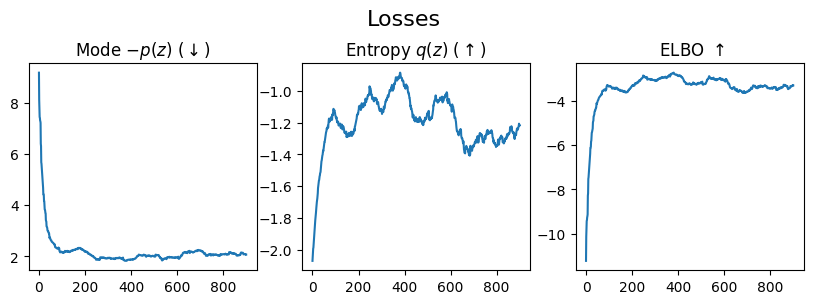

In [4]:
# plot training losses
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (10,3)) 
window_size = 100
mod =  sliding_window_view(losses_mod, window_shape = window_size)
ent = sliding_window_view(losses_ent, window_shape = window_size)

axs[0].plot(np.mean(mod, axis = -1))
axs[0].set_title(r'Mode $- p(z)$ ($\downarrow$)')

axs[1].plot(np.mean(ent, axis = -1))
axs[1].set_title(r'Entropy $q(z)$ ($\uparrow$)' )

axs[2].plot(- np.mean(mod - ent, axis = -1))
axs[2].set_title(r' ELBO $\uparrow$')

fig.suptitle("Losses", fontsize=16)
fig.subplots_adjust(top=0.80)

## 2. Predict

100%|██████████| 300/300 [00:00<00:00, 30873.77it/s]


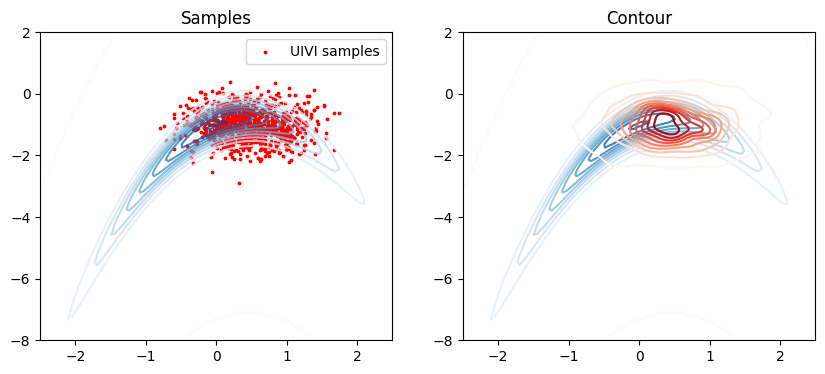

In [5]:
# evaluate banana distribution on meshgrid
num_points = 100
grid, xx, yy = make_meshgrid(lims_x = (-2.5, 2.5), lims_y = (-8, 2), num_points = num_points)
log_probs = get_log_probs_banana(mean = mean, cov =  cov, grid =  grid, m = num_points, n = num_points)

# draw samples from uivi
z_samples, _ = draw_uivi_samples(model, num_samples= 300)

# plot
fig, axs = plot_samples(z_samples, xx, yy, log_probs)
fig.savefig('banana.png', bbox_inches = 'tight')